### Imports

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Task 1

1. Create a random 4x4 array from an exponential distribution. Refer numpy functions.

In [30]:
lambda_param = 0.5

random_array = np.random.exponential(scale=1/lambda_param, size=(4, 4))

print(random_array)

[[0.8748658  2.34021005 4.09875688 0.32010094]
 [2.65128948 2.89256227 1.31091971 7.77233911]
 [0.21978077 2.76526469 0.32341207 5.19116713]
 [0.19372695 0.89908171 0.30763147 0.13945984]]


2. Create a random 100000x1 array from the same exponential distribution and visualize the distribution histogram along with uniform and normal distributions. Use the code given below and do the necessary changes. Change the number of bins and the plot view to make the visualization better.

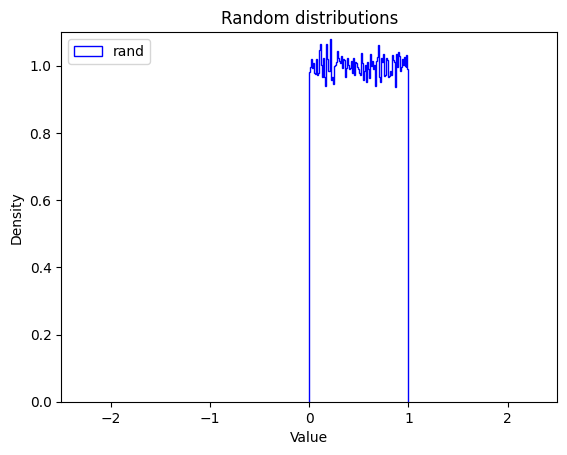

In [31]:
plt.hist(np.random.rand(100000), density=True, bins=100, histtype="step", color="blue", label="rand")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

3. Using matplotlib, plot the Z = X**2 + Y**2 in a 3D plot. Limit the x and y values to [-5, 5].

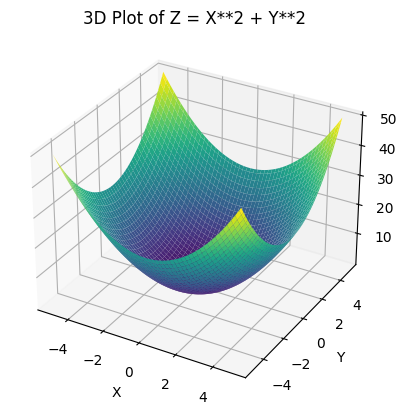

In [32]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('3D Plot of Z = X**2 + Y**2')

plt.show()

4. Calculate the pearson standard coefficient and spearman rank correlation for the [HP, Attack, Defense, Sp. Ark, Sp. Def, Speed] features in the seaborn tutorial.ipynb. Visualize the results using heatmaps. Make sure the values are displaced in the heatmap as well.

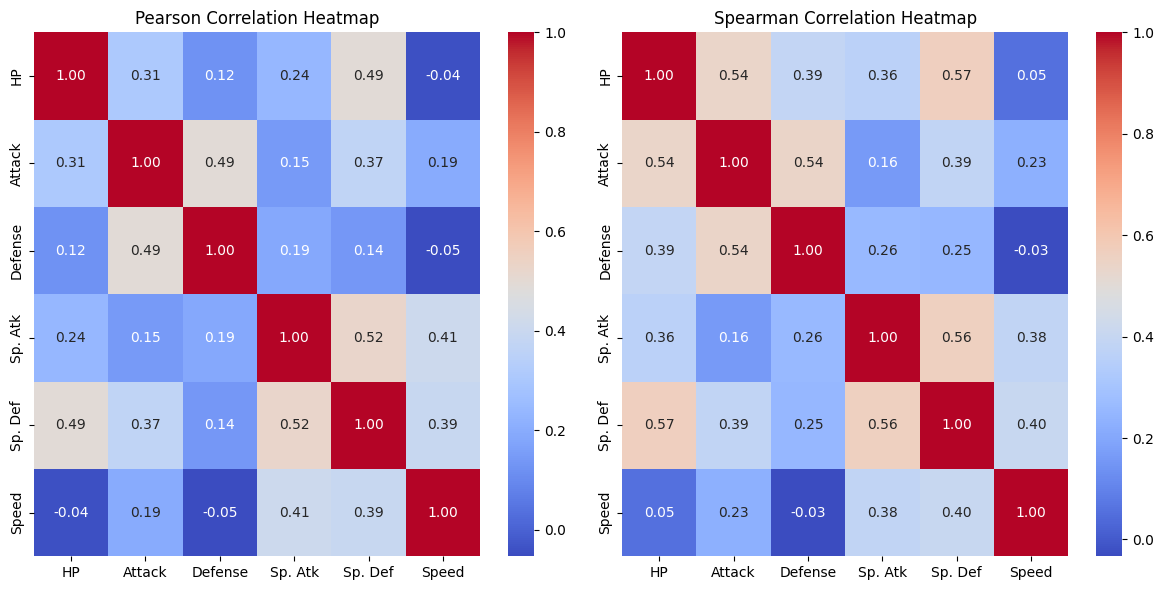

In [33]:
# !wget -q https://elitedatascience.com/wp-content/uploads/2022/07/Pokemon.csv

df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')

# print(df.columns)

selected_features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
selected_data = df[selected_features]

pearson_corr = selected_data.corr(method='pearson')

spearman_corr = selected_data.corr(method='spearman')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', ax=ax1)
ax1.set_title('Pearson Correlation Heatmap')

sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', ax=ax2)
ax2.set_title('Spearman Correlation Heatmap')

plt.tight_layout()

plt.show()

# New section

### Task 2

Read dataset

In [34]:
data = pd.read_csv("/content/Au_nanoparticle_dataset.csv")

1. Create a new dataframe by filtering all the columns [i.e., features] except N_total, N_bulk, N_surface and R_avg columns.
2. Display the first 20 samples of this dataframe.

In [35]:
selected_columns = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
filtered_data = data[selected_columns]

filtered_data.head(20)

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


3. Calculate the mean, standard deviation and quartile values for each of the above 4 features.

In [36]:
statistics = filtered_data.describe()
print(statistics)

            N_total        N_bulk   N_surface        R_avg
count   4000.000000   4000.000000  4000.00000  4000.000000
mean    3476.786500   2521.550250   955.23625    20.654363
std     3679.286769   2976.232459   721.87022     7.610716
min      236.000000     89.000000   137.00000     8.528600
25%     1061.000000    618.750000   437.00000    15.160725
50%     1867.000000   1199.000000   666.00000    18.629250
75%     4503.000000   3183.000000  1301.75000    25.525125
max    14277.000000  11580.000000  3190.00000    39.239200


4. Plot the histogram of each of these features in a 1x4 layout.

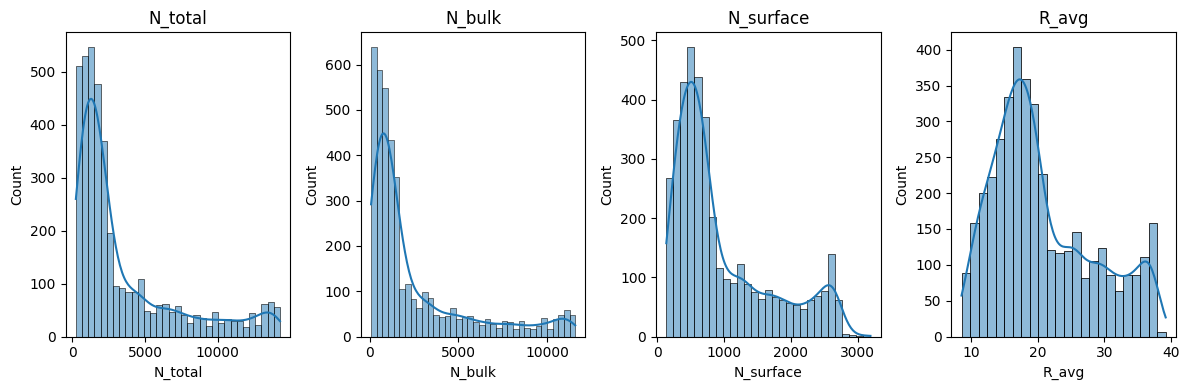

In [37]:
plt.figure(figsize=(12, 4))
for idx, col in enumerate(filtered_data.columns):
    plt.subplot(1, 4, idx + 1)
    sns.histplot(filtered_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

5. Visualize the scatter plots and histograms of this dataframe using the pairplot functionality of seaborn library.

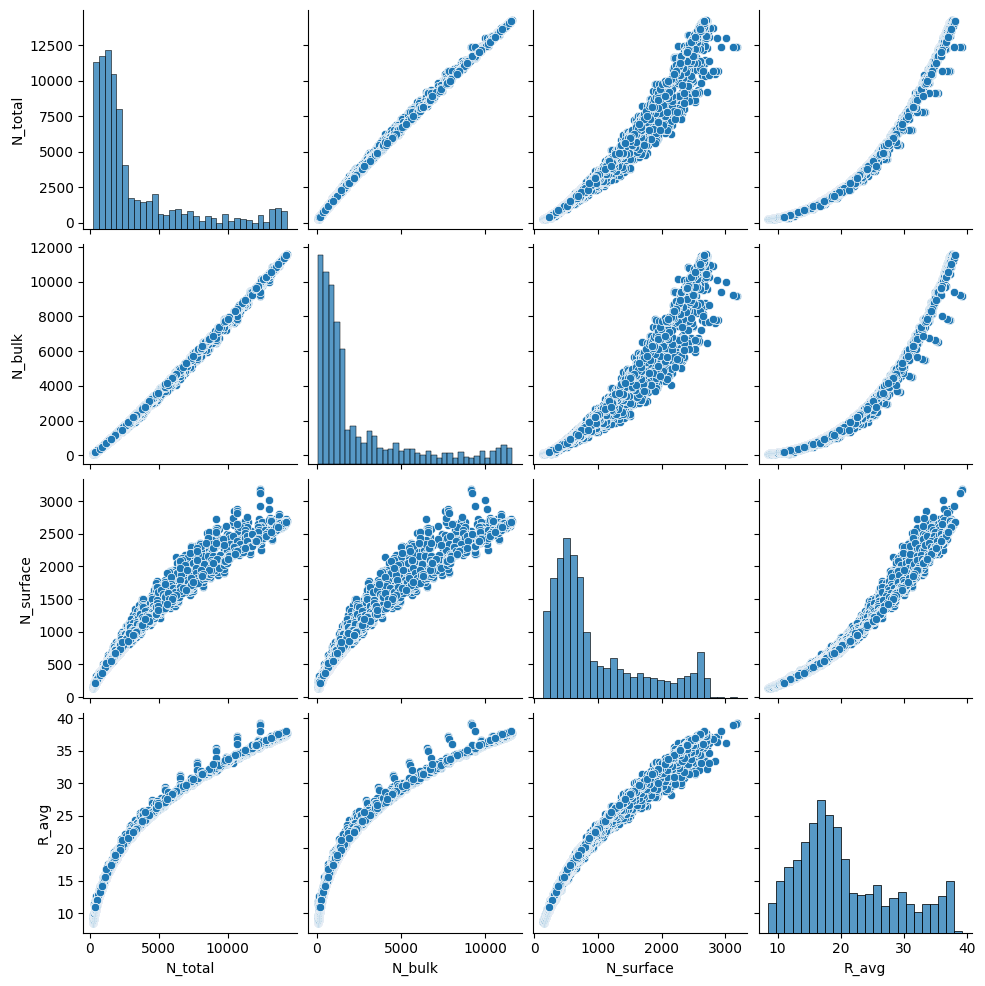

In [38]:
sns.pairplot(filtered_data)
plt.show()

6.	Add the below code and change it such that,
* Plots on the diagonal contains the histogram of each feature along with the kernal density estimation plot.
*	Plots on the lower half [g.map_lower] contains the bivariate kernal density estimation plot.




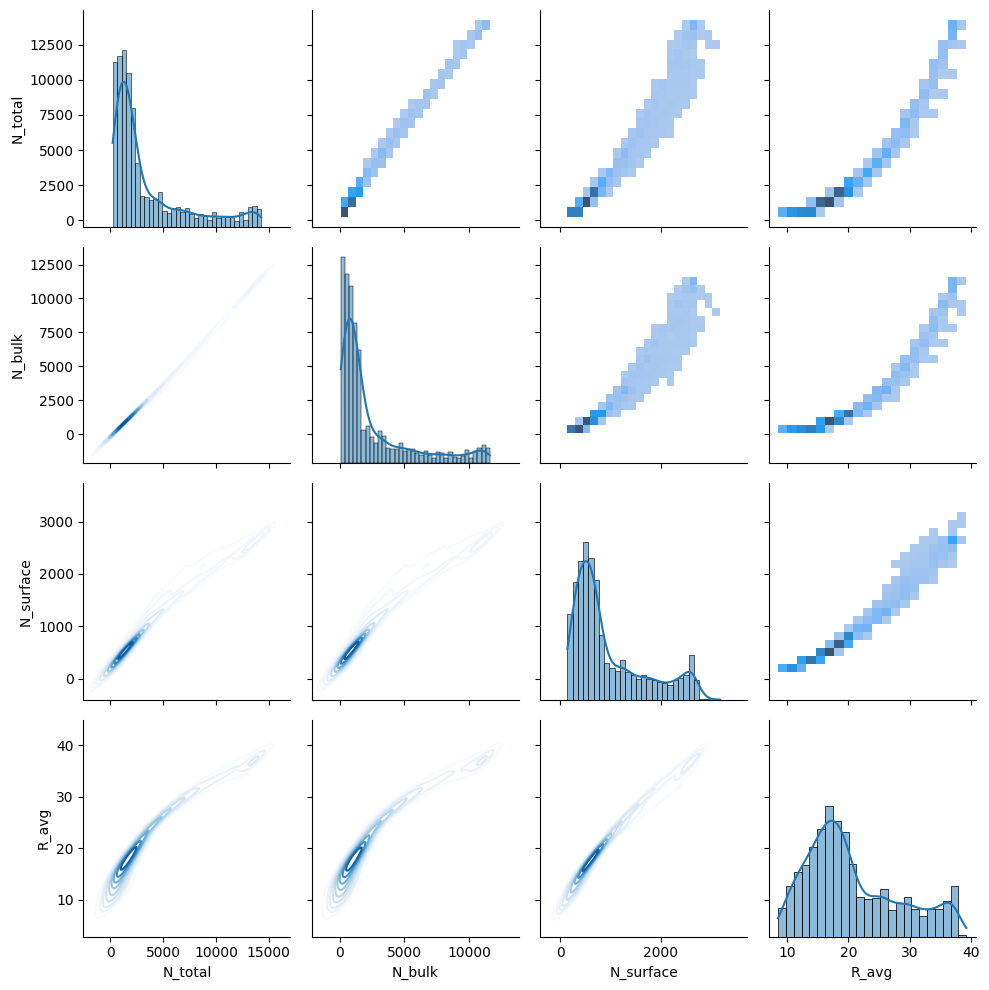

In [39]:
g = sns.PairGrid(filtered_data)

g.map_upper(sns.histplot, bins=20)

g.map_diag(sns.histplot, kde=True)

g.map_lower(sns.kdeplot, cmap='Blues')

plt.tight_layout()
plt.show()